<a href="https://colab.research.google.com/github/AkashMuttalwad/ML_Learning/blob/main/USA_Airlines_Sentiment_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**

**Introduction to Support Vector Machines (SVM)**

**What are Support Vector Machines?**

**Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression**. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line. In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data. So by this, you must have understood that inherently, SVM can only perform binary classification (i.e., choose between two classes). However, there are various techniques to use for multi-class problems. Support Vector Machine for Multi-CLass Problems To perform SVM on multi-class problems, we can create a binary classifier for each class of the data. The two results of each classifier will be :

**For example**

in a class of fruits, to perform multi-class classification, we can create a binary classifier for each fruit. For say, the ‘mango’ class, there will be a binary classifier to predict if it IS a mango OR it is NOT a mango. The classifier with the highest score is chosen as the output of the SVM. SVM for complex (Non Linearly Separable) SVM works very well without any modifications for linearly separable data. Linearly Separable Data is any data that can be plotted in a graph and can be separated into classes using a straight line.


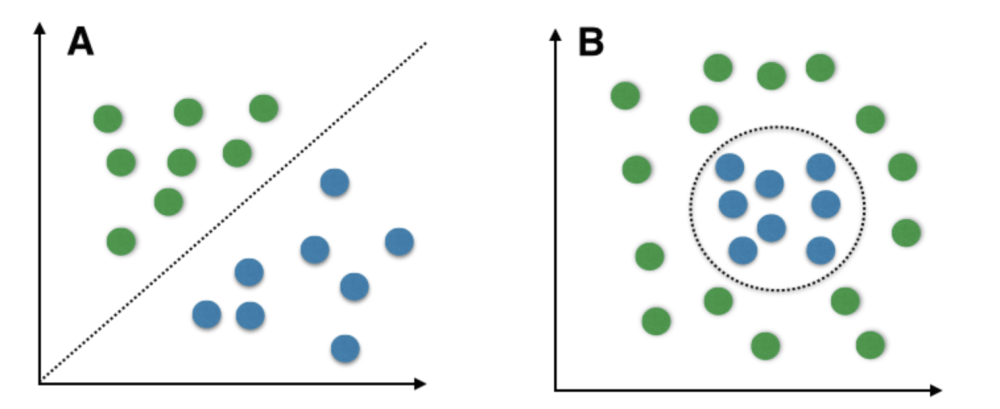


We use Kernelized SVM for non-linearly separable data. Say, we have some non-linearly separable data in one dimension. We can transform this data into two dimensions and the data will become linearly separable in two dimensions. This is done by mapping each 1-D data point to a corresponding 2-D ordered pair. So for any non-linearly separable data in any dimension, we can just map the data to a higher dimension and then make it linearly separable. This is a very powerful and general transformation. A kernel is nothing but a measure of similarity between data points. The kernel function in a kernelized SVM tells you, that given two data points in the original feature space, what the similarity is between the points in the newly transformed feature space. There are various kernel functions available, but two are very popular :


**Radial Basis Function Kernel (RBF)**:

 The similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown below. RBF is the default kernel used in SVM.
K(x,x') = exp(-\gamma||x-x'||²)
Polynomial Kernel: The Polynomial kernel takes an additional parameter, ‘degree’ that controls the model’s complexity and computational cost of the transformation


A very interesting fact is that SVM does not actually have to perform this actual transformation on the data points to the new high dimensional feature space. This is called the kernel trick. The Kernel Trick: Internally, the kernelized SVM can compute these complex transformations just in terms of similarity calculations between pairs of points in the higher dimensional feature space where the transformed feature representation is implicit. This similarity function, which is mathematically a kind of complex dot product is actually the kernel of a kernelized SVM. This makes it practical to apply SVM when the underlying feature space is complex or even infinite-dimensional. The kernel trick itself is quite complex and is beyond the scope of this article. Important Parameters in Kernelized SVC ( Support Vector Classifier)

**The Kernel**: The kernel, is selected based on the type of data and also the type of transformation. By default, the kernel is Radial Basis Function Kernel (RBF).
**Gamma** : This parameter decides how far the influence of a single training example reaches during transformation, which in turn affects how tightly the decision boundaries end up surrounding points in the input space. If there is a small value of gamma, points farther apart are considered similar. So more points are grouped together and have smoother decision boundaries (maybe less accurate). Larger values of gamma cause points to be closer together (may cause overfitting).

The ‘C’ parameter: This parameter controls the amount of regularization applied to the data. Large values of C mean low regularization which in turn causes the training data to fit very well (may cause overfitting). Lower values of C mean higher regularization which causes the model to be more tolerant of errors (may lead to lower accuracy).
Pros of Kernelized SVM: 

They perform very well on a range of datasets.
They are versatile: different kernel functions can be specified, or custom kernels can also be defined for specific datatypes.
They work well for both high and low dimensional data.
Cons of Kernelized SVM: 

Efficiency (running time and memory usage) decreases as the size of the training set increases.

Needs careful normalization of input data and parameter tuning.
Does not provide a direct probability estimator.
Difficult to interpret why a prediction was made

# sentiment analysis about the problems of each major U.S. airline.

**we have  given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").**



Importing some Requierd Labrairies 

In [2]:
import numpy as np
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
import warnings

warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sn
import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/MyDrive/Tweets.csv")

In [41]:
print("Dataset size:", len(df))

Dataset size: 11541


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada),NaN,NaN
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),NaN,NaN
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada),NaN,NaN
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),NaN,NaN
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),NaN,NaN
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),NaN,NaN
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada),NaN,NaN
7,5.703000e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2/24/2015 11:12,Los Angeles,Pacific Time (US & Canada),NaN,NaN
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2/24/2015 11:11,San Diego,Pacific Time (US & Canada),NaN,NaN
9,5.702950e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2/24/2015 10:53,Los Angeles,Eastern Time (US & Canada),NaN,NaN


In [11]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count,Unnamed: 15,Unnamed: 16
count,1.464000e+04,14640.000000,10522.000000,14640.000000,0.0,0.0
mean,5.692185e+17,0.900169,0.638298,0.082650,NaN,NaN
std,7.791741e+14,0.162830,0.330440,0.745778,NaN,NaN
min,5.675880e+17,0.335000,0.000000,0.000000,NaN,NaN
25%,5.685590e+17,0.692300,0.360600,0.000000,NaN,NaN
50%,5.694780e+17,1.000000,0.670600,0.000000,NaN,NaN
75%,5.698920e+17,1.000000,1.000000,0.000000,NaN,NaN
max,5.703110e+17,1.000000,1.000000,44.000000,NaN,NaN


checking null values in tweet dataset

In [12]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
Unnamed: 15                     14640
Unnamed: 16                     14640
dtype: int64

In [32]:
# Unique values of sentiment
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

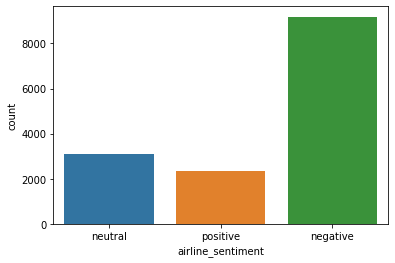

In [33]:
# Unique values of sentiment plot

ax = sns.countplot(x="airline_sentiment", data=df)

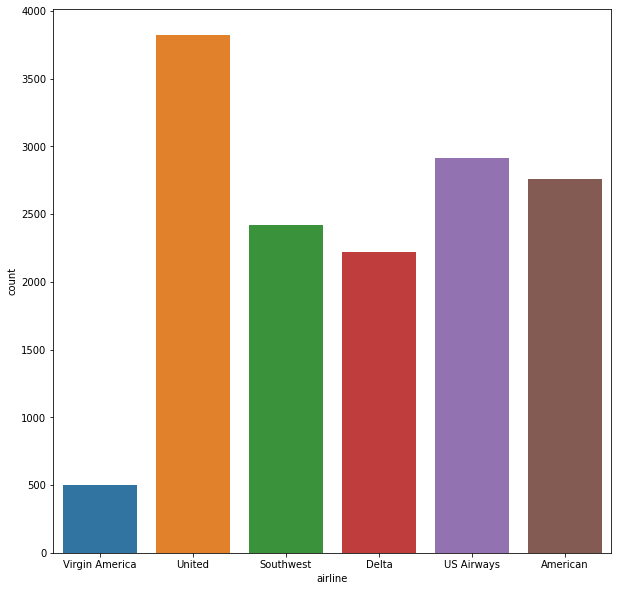

In [34]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)

In [44]:
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/si

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [56]:
print("Dataset size:", len(df))

Dataset size: 11541


In [57]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),NaN,NaN
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),NaN,NaN
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),NaN,NaN
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),NaN,NaN
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada),NaN,NaN


Map target label to String

0 -> NEGATIVE

2 -> NEUTRAL

4 -> POSITIVE

In [58]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [61]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [62]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [63]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 604 ms, sys: 0 ns, total: 604 ms
Wall time: 607 ms


In [64]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 9232
TEST size: 2309


In [65]:
%%time
documents = [_text.split() for _text in df_train.text] 

CPU times: user 16.7 ms, sys: 5.15 ms, total: 21.8 ms
Wall time: 23.9 ms


In [80]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [86]:
tweet_data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')
print("data shape:",tweet_data.shape)
print("what are columns:",tweet_data.columns)
tweet_data.head()

data shape: (14640, 17)
what are columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada),NaN,NaN
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),NaN,NaN
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada),NaN,NaN
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada),NaN,NaN
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada),NaN,NaN


In [87]:
tweet_data = tweet_data.drop(['tweet_id','retweet_count', 'tweet_coord', 'tweet_created',
                               'tweet_location','name','user_timezone'],axis = 1)

In [88]:
tweet_data['negativereason_gold'].unique()

array([nan, 'Late Flight\nFlight Attendant Complaints',
       'Late Flight\nLost Luggage', 'Late Flight',
       'Customer Service Issue', "Can't Tell",
       'Cancelled Flight\nCustomer Service Issue', 'Cancelled Flight',
       'Bad Flight', 'Lost Luggage\nDamaged Luggage',
       'Late Flight\nCancelled Flight', 'Flight Attendant Complaints',
       'Customer Service Issue\nLost Luggage',
       "Customer Service Issue\nCan't Tell"], dtype=object)

In [89]:
tweet_data['negativereason'] = tweet_data['negativereason'].fillna('')
tweet_data['negativereason_confidence'] = tweet_data['negativereason_confidence'].fillna(0)
tweet_data['airline_sentiment_gold'] = tweet_data['airline_sentiment_gold'].fillna('')
tweet_data['negativereason_gold'] = tweet_data['negativereason_gold'].fillna('')

In [90]:
tweet_data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,Unnamed: 15,Unnamed: 16
0,neutral,1.0000,,0.0000,Virgin America,,,@VirginAmerica What @dhepburn said.,NaN,NaN
1,positive,0.3486,,0.0000,Virgin America,,,@VirginAmerica plus you've added commercials t...,NaN,NaN
2,neutral,0.6837,,0.0000,Virgin America,,,@VirginAmerica I didn't today... Must mean I n...,NaN,NaN
3,negative,1.0000,Bad Flight,0.7033,Virgin America,,,@VirginAmerica it's really aggressive to blast...,NaN,NaN
4,negative,1.0000,Can't Tell,1.0000,Virgin America,,,@VirginAmerica and it's a really big bad thing...,NaN,NaN


In [91]:
print("different topics of negative reasons are:",tweet_data['negativereason'].unique())

different topics of negative reasons are: ['' 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [92]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 6.7 MB/s 
     |████████████████████████████████| 287 kB 49.9 MB/s 


In [93]:
from nltk.corpus import stopwords
import string
import re
import contractions
def text_cleaning(text):
    #not removing the stopwords so that the sentences stay normal.
    #forbidden_words = set(stopwords.words('english'))
    if text:
        text = contractions.fix(text)
        text = ' '.join(text.split('.'))
        text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z0-9]', ' ', text.strip().lower())).strip()
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        text = [word for word in text.split()]
        return text
    return []

In [94]:
tweet_data['text'] = tweet_data['text'].apply(lambda x: ' '.join(text_cleaning(x)))

In [95]:
tweet_data.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,Unnamed: 15,Unnamed: 16
0,neutral,1.0000,,0.0000,Virgin America,,,virginamerica what dhepburn said,NaN,NaN
1,positive,0.3486,,0.0000,Virgin America,,,virginamerica plus you have added commercials ...,NaN,NaN
2,neutral,0.6837,,0.0000,Virgin America,,,virginamerica i did not today must mean i need...,NaN,NaN
3,negative,1.0000,Bad Flight,0.7033,Virgin America,,,virginamerica it is really aggressive to blast...,NaN,NaN
4,negative,1.0000,Can't Tell,1.0000,Virgin America,,,virginamerica and it is a really big bad thing...,NaN,NaN
5,negative,1.0000,Can't Tell,0.6842,Virgin America,,,virginamerica seriously would pay 30 a flight ...,NaN,NaN
6,positive,0.6745,,0.0000,Virgin America,,,virginamerica yes nearly every time i fly vx t...,NaN,NaN
7,neutral,0.6340,,0.0000,Virgin America,,,virginamerica really missed a prime opportunit...,NaN,NaN
8,positive,0.6559,,0.0000,Virgin America,,,virginamerica well i did not but now i do d,NaN,NaN
9,positive,1.0000,,0.0000,Virgin America,,,virginamerica it was amazing and arrived an ho...,NaN,NaN


**n this section we will perform sentiment analysis using nltk.**

In [96]:
import nltk

In [97]:
nltk.download(["names","stopwords","state_union","twitter_samples",
              "movie_reviews","averaged_perceptron_tagger","vader_lexicon",
              "punkt"])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

How to calculate sentiment from nltk:
NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

To use VADER, first create an instance of nltk.sentiment.SentimentIntensityAnalyzer, then use .polarity_scores() on a raw string:

In [98]:
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
sia = SIA()
print(sia.polarity_scores('wow! this nltk library really works'))

{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.6239}


 The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1

Let's append this sentiment scores to our original dataset.

In [99]:
texts = tweet_data['text'].tolist()
negative_scores = []
neutral_scores = []
positive_scores = []
compound_scores = []
final_tag = []
for text in texts:
    score_dictionary = sia.polarity_scores(text)
    negative_scores.append(score_dictionary['neg'])
    positive_scores.append(score_dictionary['pos'])
    neutral_scores.append(score_dictionary['neu'])
    compound_scores.append(score_dictionary['compound'])
    if score_dictionary['compound']>0:
        final_tag.append('positive')
    elif score_dictionary['compound']<0:
        final_tag.append('negative')
    else:
        final_tag.append('neutral')
tweet_data['negative_score'] = negative_scores
tweet_data['positive_score'] = positive_scores
tweet_data['neutral_score'] = neutral_scores
tweet_data['compound_score'] = compound_scores
tweet_data['final_tag'] = final_tag

In [100]:
tweet_data.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,Unnamed: 15,Unnamed: 16,negative_score,positive_score,neutral_score,compound_score,final_tag
0,neutral,1.0000,,0.0000,Virgin America,,,virginamerica what dhepburn said,NaN,NaN,0.000,0.000,1.000,0.0000,neutral
1,positive,0.3486,,0.0000,Virgin America,,,virginamerica plus you have added commercials ...,NaN,NaN,0.000,0.000,1.000,0.0000,neutral
2,neutral,0.6837,,0.0000,Virgin America,,,virginamerica i did not today must mean i need...,NaN,NaN,0.000,0.000,1.000,0.0000,neutral
3,negative,1.0000,Bad Flight,0.7033,Virgin America,,,virginamerica it is really aggressive to blast...,NaN,NaN,0.216,0.123,0.661,-0.2716,negative
4,negative,1.0000,Can't Tell,1.0000,Virgin America,,,virginamerica and it is a really big bad thing...,NaN,NaN,0.296,0.000,0.704,-0.5829,negative
5,negative,1.0000,Can't Tell,0.6842,Virgin America,,,virginamerica seriously would pay 30 a flight ...,NaN,NaN,0.238,0.069,0.693,-0.5945,negative
6,positive,0.6745,,0.0000,Virgin America,,,virginamerica yes nearly every time i fly vx t...,NaN,NaN,0.000,0.172,0.828,0.4019,positive
7,neutral,0.6340,,0.0000,Virgin America,,,virginamerica really missed a prime opportunit...,NaN,NaN,0.142,0.175,0.683,0.1458,positive
8,positive,0.6559,,0.0000,Virgin America,,,virginamerica well i did not but now i do d,NaN,NaN,0.000,0.205,0.795,0.1406,positive
9,positive,1.0000,,0.0000,Virgin America,,,virginamerica it was amazing and arrived an ho...,NaN,NaN,0.000,0.340,0.660,0.7717,positive


some sentences are failing.

In [101]:
texts[17]

'virginamerica i flew from nyc to sfo last week and could not fully sit in my seat due to two large gentleman on either side of me help'

In [102]:
from sklearn.metrics import classification_report as crep
print("sentiment analysis performance for nltk:")
print(crep(tweet_data['airline_sentiment'],tweet_data['final_tag']))

sentiment analysis performance for nltk:
              precision    recall  f1-score   support

    negative       0.90      0.45      0.60      9178
     neutral       0.43      0.32      0.37      3099
    positive       0.27      0.90      0.42      2363

    accuracy                           0.49     14640
   macro avg       0.53      0.56      0.46     14640
weighted avg       0.70      0.49      0.52     14640



In [103]:
!pip install -U textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.0 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is

In [104]:
from textblob import TextBlob

In [105]:
tb1 = TextBlob('I just am trying textblob first time.')
tb1

TextBlob("I just am trying textblob first time.")

**Before doing sentiment analysis, let's explore a few attributes.**

# **tokenization and sentence segmentation:**

In [107]:
tb1.words

WordList(['I', 'just', 'am', 'trying', 'textblob', 'first', 'time'])

In [108]:
tb1.sentences

[Sentence("I just am trying textblob first time.")]

In [109]:
tb1.noun_phrases

WordList([])

In [110]:
tb2=TextBlob("Tags will give the Part of speech for all the words.")
tb2.tags

[('Tags', 'NNP'),
 ('will', 'MD'),
 ('give', 'VB'),
 ('the', 'DT'),
 ('Part', 'NNP'),
 ('of', 'IN'),
 ('speech', 'NN'),
 ('for', 'IN'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('words', 'NNS')]

In [111]:
tb3=TextBlob(" We are learning cool Library . We are enjoying a lot .")
tb3.noun_phrases

WordList(['cool library'])

In [112]:
type(tb3.noun_phrases)

textblob.blob.WordList

Less than 0 denotes Negative

Equal to 0 denotes Neutral

Greater than 0 denotes Positive


A value near to +1 is more likely to be positive than a value near 0. The same is in the case of negativity.

In [113]:
doc2=TextBlob("We are having fun here")
doc2.polarity

0.3

In [115]:
texts = tweet_data['text'].tolist()
textblob_score = []
textblob_tag = []
for text in texts:
    doc_current = TextBlob(text)
    score = doc_current.polarity
    textblob_score.append(score)
    if score > 0:
        textblob_tag.append('positive')
    elif score<0:
        textblob_tag.append('negative')
    else:
        textblob_tag.append('neutral')
tweet_data['textblob_score'] = textblob_score
tweet_data['textblob_sentiment_tag'] = textblob_tag

In [116]:
tweet_data[['airline_sentiment','text','textblob_score','textblob_sentiment_tag']].head(20)

,airline_sentiment,text,textblob_score,textblob_sentiment_tag
0,neutral,virginamerica what dhepburn said,0.000000,neutral
1,positive,virginamerica plus you have added commercials ...,0.000000,neutral
2,neutral,virginamerica i did not today must mean i need...,-0.312500,negative
3,negative,virginamerica it is really aggressive to blast...,0.006250,positive
4,negative,virginamerica and it is a really big bad thing...,-0.350000,negative
5,negative,virginamerica seriously would pay 30 a flight ...,-0.208333,negative
6,positive,virginamerica yes nearly every time i fly vx t...,0.450000,positive
7,neutral,virginamerica really missed a prime opportunit...,0.200000,positive
8,positive,virginamerica well i did not but now i do d,0.000000,neutral
9,positive,virginamerica it was amazing and arrived an ho...,0.466667,positive


So textblob is also fine and matches most of the airline tags, but doesn't match in a few cases. Interestingly, the case 17th, where it was a sense wise negative sentence, is again missed by textblob as well. Let's check the textblob's accuracy.

In [117]:
print("sentiment analysis with textblob:")
print(crep(tweet_data['airline_sentiment'],tweet_data['textblob_sentiment_tag']))

sentiment analysis with textblob:
              precision    recall  f1-score   support

    negative       0.88      0.35      0.50      9178
     neutral       0.32      0.56      0.41      3099
    positive       0.32      0.76      0.45      2363

    accuracy                           0.46     14640
   macro avg       0.51      0.56      0.46     14640
weighted avg       0.67      0.46      0.47     14640

